# **The Sparks Foundation**
# **Data Science and Business Analytics**
# by **Manojit Roy**
# Task #1

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Creating the DataFrame

In [2]:
data = pd.read_csv('/content/drive/MyDrive/student_scores - student_scores.csv')

In [3]:
data.head() # printing the whole dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Visualizing the dataset

Text(0.5, 1.0, 'Scores Vs. Marks')

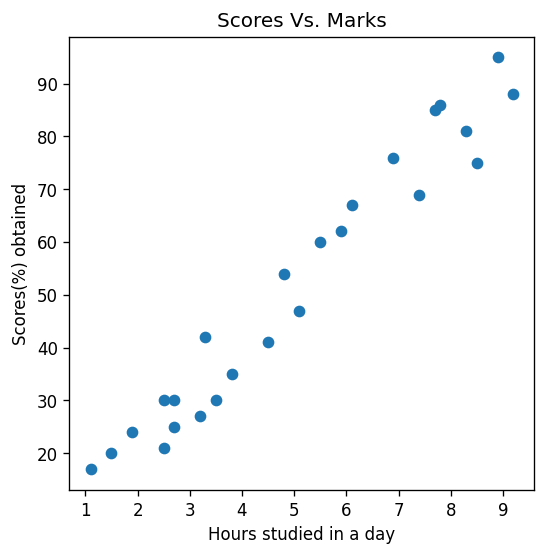

In [4]:

plt.figure(figsize=(5,5), dpi=120)
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel('Hours studied in a day')
plt.ylabel('Scores(%) obtained')
plt.title('Scores Vs. Marks')

# Splitting the DataFrame Object into forcaster Series object and target Series Object.


In [5]:
X = np.array(data['Hours'])
y = np.array(data['Scores'])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20,), (20,), (5,), (5,))

## Importing the LinearRegression class from Scikit Learn

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

## Fitting the model with our training dataset

In [8]:
lin_reg.fit(X_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Printing the parameter of our hypothesis function

In [9]:
lin_reg.intercept_, lin_reg.coef_

(2.826892353899737, array([9.68207815]))

## Predicting the testset

In [10]:
y_pred_test = lin_reg.predict(X_test.reshape(-1,1))

## Plotting the regression line on our dataset

Text(0, 0.5, 'Scores obtained')

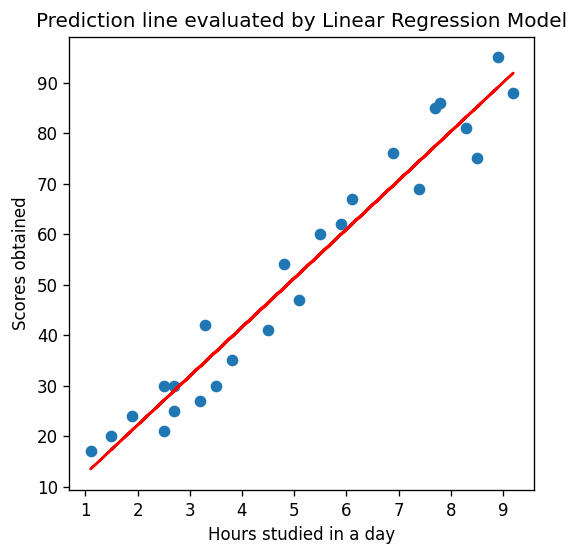

In [11]:
plt.figure(figsize=(5,5), dpi=120)
y_pred = lin_reg.intercept_ + lin_reg.coef_*X
plt.scatter(X, y)
plt.plot(X,y_pred,"r-")
plt.title('Prediction line evaluated by Linear Regression Model')
plt.xlabel('Hours studied in a day')
plt.ylabel('Scores obtained')

## Linear Regression using SGDRegressor Class of sklearn

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train.reshape(-1,1),y_train.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

## Printing the parameters of our hypothesis function

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([2.62236754]), array([11.25393393]))

## Prediciting the TestSet

In [14]:
y_pred_test_sgd = sgd_reg.predict(X_test.reshape(-1,1))

## Comparative Analysis of the above two linear models

In [15]:
from sklearn.metrics import mean_squared_error


In [16]:
np.sqrt(mean_squared_error(y_test, y_pred_test)), np.sqrt(mean_squared_error(y_test, y_pred_test_sgd))

(4.352380006653288, 8.82312630748487)

* Hence, the Stochastic Gradient Descent algorithm based model works well comparatively.

## Predicting marks for a score value = 9.25 Hours

In [17]:
lin_reg.predict(np.array(9.25).reshape(-1,1))

array([92.38611528])

* According to our LinearRegression Class based model, a student who studys for 9.25 hours a day can score 93% more or less.

In [18]:
sgd_reg.predict(np.array(9.25).reshape(-1,1))

array([106.72125636])

* According to our Stochastic Gradient Descent, a student who studys for 9.25 Hours a day can score 96%(approximately).

